In [204]:
# import all the libraries, Pandas (data processing), Mat
import pandas as pd
import matplotlib as plt
import numpy as np

#import linear model for linearregression and polynomial
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# seaborn is a ploting package
import seaborn as sns

In [205]:
# open data folder from .cvs file. files are obtained from https://health-infobase.canada.ca/covid-19/
path = 'covid19.csv'

#place data into a DataFrame
df = pd.read_csv(path, header=None)

In [206]:
#reject unwanted naming conventions
# this data has NaN or utilized percet of cases /day which can be calculated if needed.
df.drop(13, axis=1, inplace=True)
df.drop(11, axis=1, inplace=True)
df.drop(10, axis=1, inplace=True)
df.drop(9, axis=1, inplace=True)
df.drop(8, axis=1, inplace=True)
df.drop(2,axis=1,inplace=True)
df.drop(0,axis=0,inplace=True)

In [207]:
#Set header names for data frame
headers = ["Province-ID","Province-Name-EN","Date","Confirmed-Cases", "Probable-Cases","Deceased",
         "Total","Total-Today"]
df.columns = headers

In [208]:
#Remove Repatriated travellers
df_1 = df[df['Province-Name-EN'] != 'Repatriated travellers']

#True is data is null false if data exsists.
missing_data_1 = df_1.isnull()
#for column in missing_data_1.columns.values.tolist():
#    print(column)
#    print(missing_data_1[column].value_counts())
#    print()

In [209]:
#change types of data from object to int for example
df_1[["Province-ID", "Confirmed-Cases","Probable-Cases"]] = df_1[["Province-ID", "Confirmed-Cases","Probable-Cases"]].astype("int")
df_1[["Deceased","Total","Total-Today"]] = df_1[["Deceased","Total","Total-Today"]].astype("int")

# Error happens here, I have read over SettingWithCopyWarning and have been unable to correct this error.
df_1[['Date']] = df_1[['Date']].astype("datetime64")


#shows what kinds of data Im working with.
df_1.dtypes

C:\Users\Paul Kot\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Province-ID                  int32
Province-Name-EN            object
Date                datetime64[ns]
Confirmed-Cases              int32
Probable-Cases               int32
Deceased                     int32
Total                        int32
Total-Today                  int32
dtype: object

In [210]:
df_1.head()

,Province-ID,Province-Name-EN,Date,Confirmed-Cases,Probable-Cases,Deceased,Total,Total-Today
1,35,Ontario,2020-01-31,3,0,0,3,3
2,59,British Columbia,2020-01-31,1,0,0,1,1
3,1,Canada,2020-01-31,4,0,0,4,4
4,35,Ontario,2020-02-08,3,0,0,3,0
5,59,British Columbia,2020-02-08,4,0,0,4,3


In [211]:
#catagorical data Display data in a different manner, this is for own personal use.
province_counts = df_1["Province-Name-EN"].value_counts().to_frame()
province_counts.rename(columns={'Province-Name-EN': 'value_counts'}, inplace=True)

province_counts.index.name = 'Province-Name-EN'
print (province_counts)
print (df_1['Province-ID'].unique())
print(df_1['Province-Name-EN'].unique())

                           value_counts
Province-Name-EN                       
British Columbia                     56
Canada                               56
Ontario                              56
Quebec                               47
Alberta                              42
Nunavut                              40
Newfoundland and Labrador            40
Prince Edward Island                 40
New Brunswick                        40
Manitoba                             40
Yukon                                40
Saskatchewan                         40
Northwest Territories                40
Nova Scotia                          40
[35 59  1 24 48 47 46 13 10 12 11 60 61 62]
['Ontario' 'British Columbia' 'Canada' 'Quebec' 'Alberta' 'Saskatchewan'
 'Manitoba' 'New Brunswick' 'Newfoundland and Labrador' 'Nova Scotia'
 'Prince Edward Island' 'Yukon' 'Northwest Territories' 'Nunavut']


In [212]:
#df_group_one = df[['Province-Name-EN','Date','Confirmed-Cases']]
df_1.set_index("Province-Name-EN", inplace=True)
df_1.head()


,Province-ID,Date,Confirmed-Cases,Probable-Cases,Deceased,Total,Total-Today
Province-Name-EN,,,,,,,
Ontario,35,2020-01-31,3,0,0,3,3
British Columbia,59,2020-01-31,1,0,0,1,1
Canada,1,2020-01-31,4,0,0,4,4
Ontario,35,2020-02-08,3,0,0,3,0
British Columbia,59,2020-02-08,4,0,0,4,3


In [213]:
# Create df for each provence
BC = df_1.loc['British Columbia']
AB = df_1.loc['Alberta']
SK = df_1.loc['Saskatchewan']
MB = df_1.loc['Manitoba']
ON = df_1.loc['Ontario']
QC = df_1.loc['Quebec']
NL = df_1.loc['Newfoundland and Labrador']
NB = df_1.loc['New Brunswick']
NS = df_1.loc['Nova Scotia']
PE = df_1.loc['Prince Edward Island']
YT = df_1.loc['Yukon']
NT = df_1.loc['Northwest Territories']
NU = df_1.loc['Nunavut']
CN = df_1.loc['Canada']

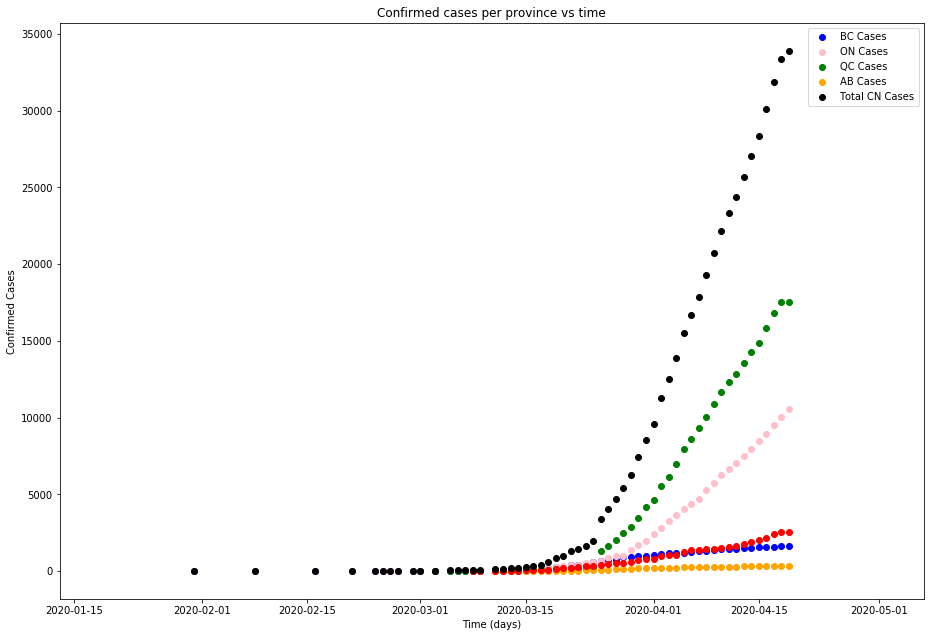

In [214]:

#develop plots for data. Linear plot


import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,2,2])
BC_Graph = ax.scatter(BC['Date'], BC['Confirmed-Cases'], color='blue')
BC_Graph.set_label('BC Cases')
ON_Graph = ax.scatter(ON['Date'], ON['Confirmed-Cases'], color='pink')
ON_Graph.set_label('ON Cases')
QC_Graph = ax.scatter(QC['Date'], QC['Confirmed-Cases'], color='g')
QC_Graph.set_label('QC Cases')
SK_Graph = ax.scatter(SK['Date'], SK['Confirmed-Cases'], color='orange')
SK_Graph.set_label('SK Cases')
AB_Graph = ax.scatter(AB['Date'], AB['Confirmed-Cases'], color='red')
SK_Graph.set_label('AB Cases')
CN_Graph = ax.scatter(CN['Date'], CN['Confirmed-Cases'], color='black')
CN_Graph.set_label('Total CN Cases')



ax.set_xlabel('Time (days)')
ax.set_ylabel('Confirmed Cases')
ax.set_title('Confirmed cases per province vs time')
ax.legend()
plt.show()

C:\Users\Paul Kot\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


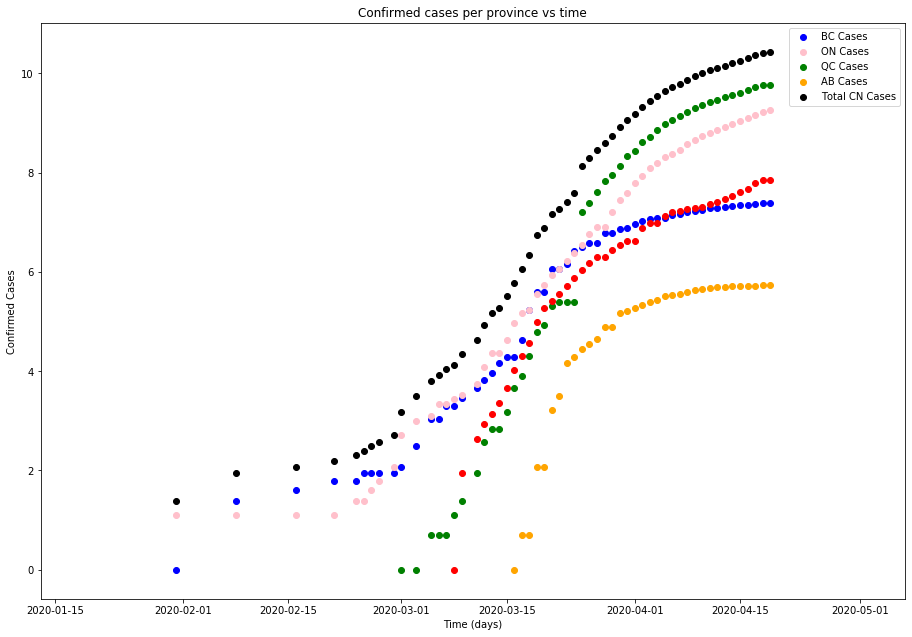

In [215]:
#develop logrithmic plot
fig1=plt.figure()
ax1=fig1.add_axes([0,0,2,2])
BC_Graph = ax1.scatter(BC['Date'], np.log(BC['Confirmed-Cases']), color='blue')
BC_Graph.set_label('BC Cases')
ON_Graph = ax1.scatter(ON['Date'], np.log(ON['Confirmed-Cases']), color='pink')
ON_Graph.set_label('ON Cases')
QC_Graph = ax1.scatter(QC['Date'], np.log(QC['Confirmed-Cases']), color='g')
QC_Graph.set_label('QC Cases')
SK_Graph = ax1.scatter(SK['Date'], np.log(SK['Confirmed-Cases']), color='orange')
SK_Graph.set_label('SK Cases')
AB_Graph = ax1.scatter(AB['Date'], np.log(AB['Confirmed-Cases']), color='red')
SK_Graph.set_label('AB Cases')
CN_Graph = ax1.scatter(CN['Date'], np.log(CN['Confirmed-Cases']), color='black')
CN_Graph.set_label('Total CN Cases')

ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Confirmed Cases')
ax1.set_title('Confirmed cases per province vs time')
ax1.legend()
plt.show()

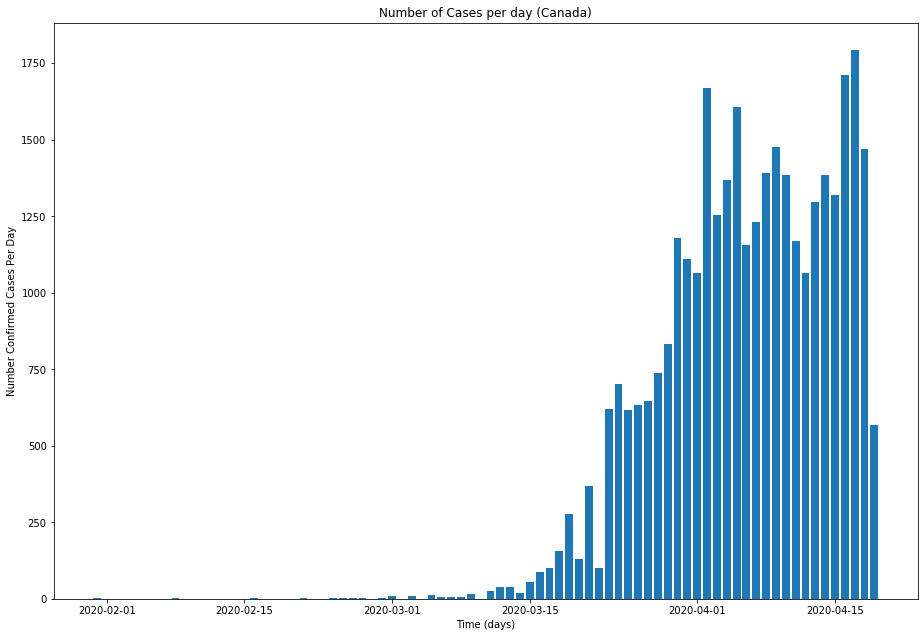

In [216]:

fig2=plt.figure()
ax2=fig2.add_axes([0,0,2,2])
CN_Graph = ax2.bar(CN['Date'], CN['Total-Today'])
CN_Graph.set_label('Total CN Cases')

ax2.set_xlabel('Time (days)')
ax2.set_ylabel('Number Confirmed Cases Per Day')
ax2.set_title('Number of Cases per day (Canada)')

plt.show()

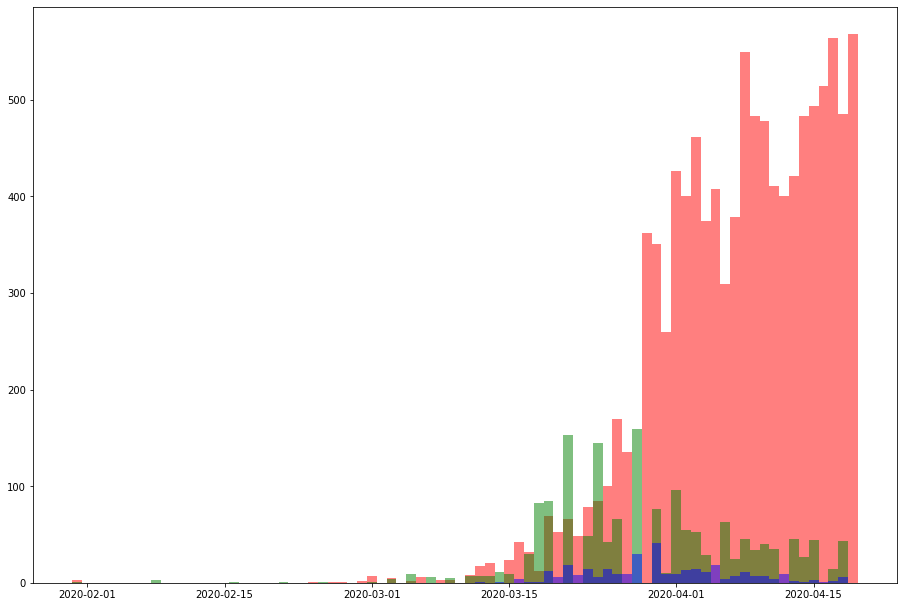

In [217]:
days = len(BC['Date'])
width = 1

fig3, ax3 = plt.subplots()
ax3 = fig3.add_axes([0,0,2,2])
#CN_Graph = ax3.bar(CN['Date'], CN['Total-Today'])
CN_Graph.set_label('Total CN Cases')
ON_Graph = ax3.bar(ON['Date'],ON['Total-Today'],width,label='ON',ls='dashed', alpha = 0.5, lw=1, color= 'r')
BC_Graph = ax3.bar(BC['Date'],BC['Total-Today'],width,label='ON',ls='dashed', alpha = 0.5, lw=1, color= 'g')
SK_Graph = ax3.bar(SK['Date'],SK['Total-Today'],width,label='ON',ls='dashed', alpha = 0.5, lw=1, color= 'b')

#plt.bar(ON['Date'],ON['Total-Today'],width,label='ON',ls='dashed', alpha = 0.5, lw=1, color= 'g')
#plt.bar(BC['Date'],BC['Total-Today'],width,label='BC',ls='dashed', alpha = 0.7, lw=1, color= 'b')
#plt.bar(SK['Date'],SK['Total-Today'],width,label='SK',ls='dotted', alpha = 0.7, lw=1, color= 'r')

#ax3=fig3.add_axes([0,0,2,2])
#ax3.bar(CN_days, BC['Total-Today'])

#ax3.set_xlabel('Time (days)')
#ax3.set_ylabel('Confirmed Cases')
#ax3.set_title('Number of Cases per day (bc)')
#plt.xlim(10,days)
#fig.tight_layout()
plt.show()
#plt.show()

<h3>1. Linear Regression and Multiple Linear Regression</h3>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The independent variable (number of days) (X)</li>
    <li>The dependent variable (that we want to predict, Number of covid cases) (Y)</li>
</ul>

$$
 Y: Dependent \ Variable \ (Covid cases)\\
 X: Independent \ Variables \ (Days)
$$

 <b>Resulting linear fuction will be:</b>
$$
Yhat = a + b  X
$$

</b> where Yhat is the predicted fit </b>

In [218]:
#import library from sklearn
from sklearn.linear_model import LinearRegression

#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [219]:
BC_1 = pd.DataFrame(df_1.loc['British Columbia'])
AB_1 = pd.DataFrame(df_1.loc['Alberta'])
SK_1 = pd.DataFrame(df_1.loc['Saskatchewan'])
MB_1 = pd.DataFrame(df_1.loc['Manitoba'])
ON_1 = pd.DataFrame(df_1.loc['Ontario'])
QC_1 = pd.DataFrame(df_1.loc['Quebec'])
CN_1 = pd.DataFrame(df_1.loc['Canada'])
 
    
CN_1.dtypes

Province-ID                 int32
Date               datetime64[ns]
Confirmed-Cases             int32
Probable-Cases              int32
Deceased                    int32
Total                       int32
Total-Today                 int32
dtype: object

In [220]:
import datetime as dt #use this to get actual days  between cases

#CN.Date = pd.to_datetime(CN.Date)
#CN.Date.dt.dayofyear.head()
#CN['Date'] = pd.to_datetime(CN['Date']) 
#CN['Date']=CN['Date'].map(dt.datetime.toordinal) 

#CN.loc[CN.Date == 'Date', 'Date'] =  CN.Date.map(dt.datetime.toordinal)
#data.loc[data.bidder == 'parakeet2004', 'bidderrate'] = 100
#CN['Date'].apply(lambda x: x.toordinal())
#CN.Date = np.arange(1,len(CN)+1)

#test = pd.DataFrame({'Date': [pd.to_datetime('2019-01-15 13:25:43')]})
#df_unix_sec = pd.to_datetime(CN['Date']).astype(int)/ 10**9
#print(df_unix_sec)

#CN[['Date']]
#for i in len(CN['Date']):
#    print(CN[['Date',i]])

In [221]:
#import data 
Y = CN[['Confirmed-Cases']]
CN_1[['Date']] = CN.Date.dt.dayofyear #inputing dates directly, will not work with lm.predict() so need to change this
X= CN_1[['Date']]
#X = CN[['Date']]

#print(CN[['Confirmed-Cases']])
#print(CN[['Date']])
#fit the data using fit
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [222]:
#pridict the model
Yhat=lm.predict(X)

#intercept
b = lm.intercept_

#slope
m = lm.coef_

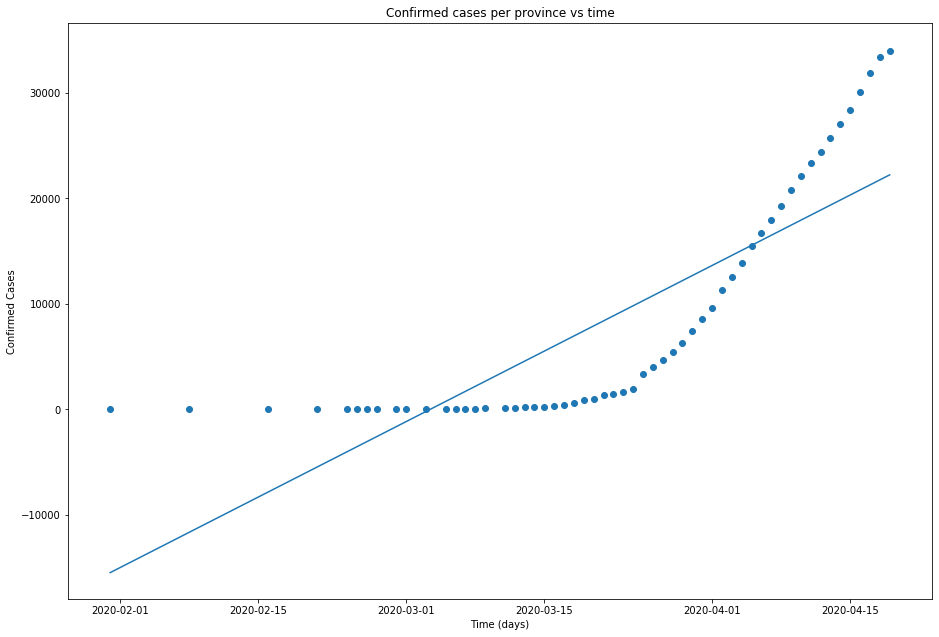

0.6851550851201311

In [223]:
#develop logrithmic plot
fig4=plt.figure()
ax4=fig4.add_axes([0,0,2,2])
ax4.plot(CN['Date'],Yhat)
ax4.scatter(CN['Date'],CN['Confirmed-Cases'])


ax4.set_xlabel('Time (days)')
ax4.set_ylabel('Confirmed Cases')
ax4.set_title('Confirmed cases per province vs time')
#ax4.legend()
plt.show()

lm.score(X,CN['Confirmed-Cases'])

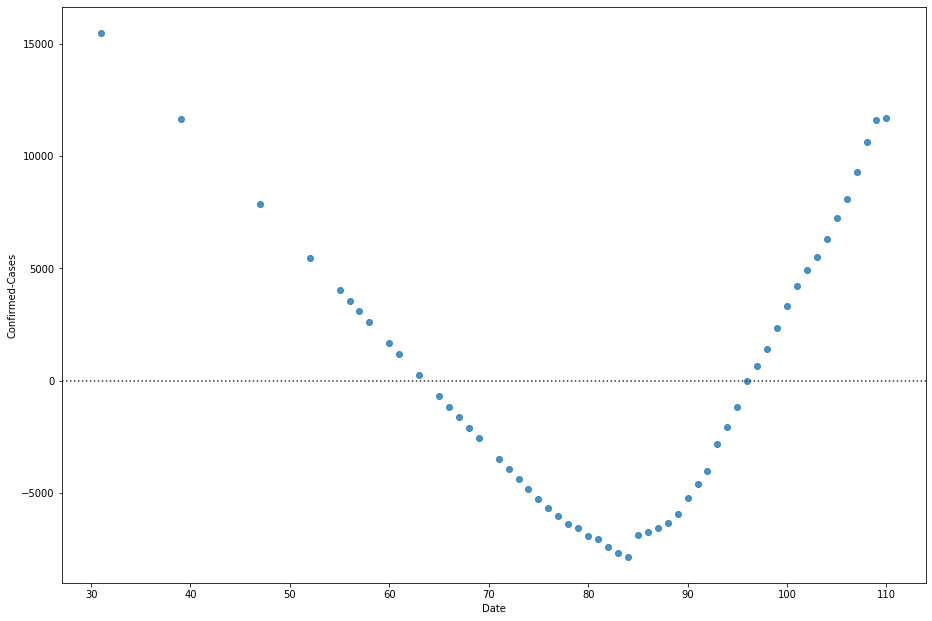

In [224]:
#plot a residual plot, to get an idea of what kind of fit is required.
fig5=plt.figure()
ax5=fig5.add_axes([0,0,2,2])
sns.residplot(X,y='Confirmed-Cases',data=CN)

#linear fit will not work with this data.

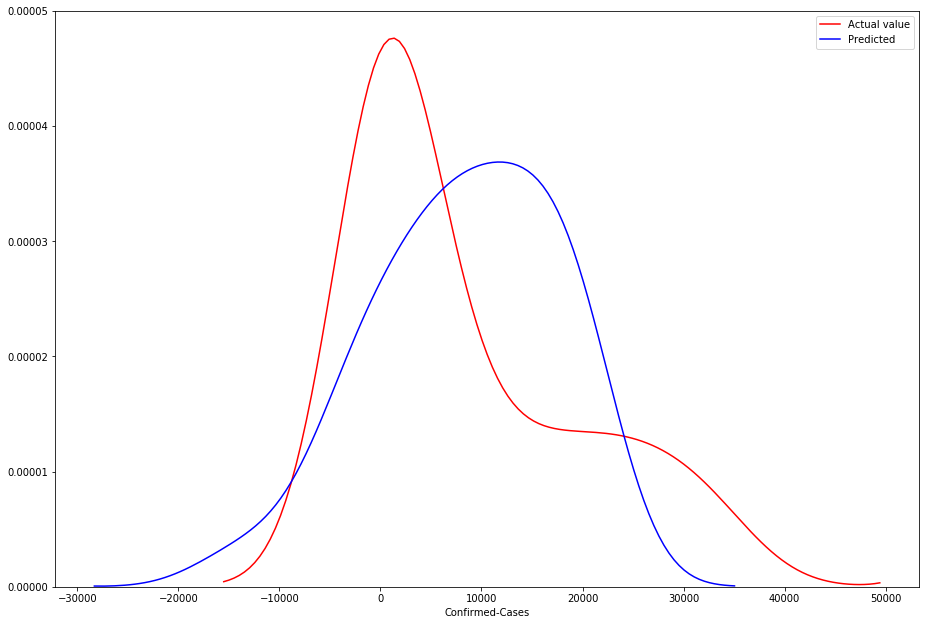

In [225]:
#Create a distribution plot
fig6=plt.figure()
ax6=fig6.add_axes([0,0,2,2])
ax6 = sns.distplot(CN['Confirmed-Cases'],hist=False,color="r",label="Actual value")
sns.distplot(Yhat,hist=False,color='b', label='Predicted', ax=ax6)


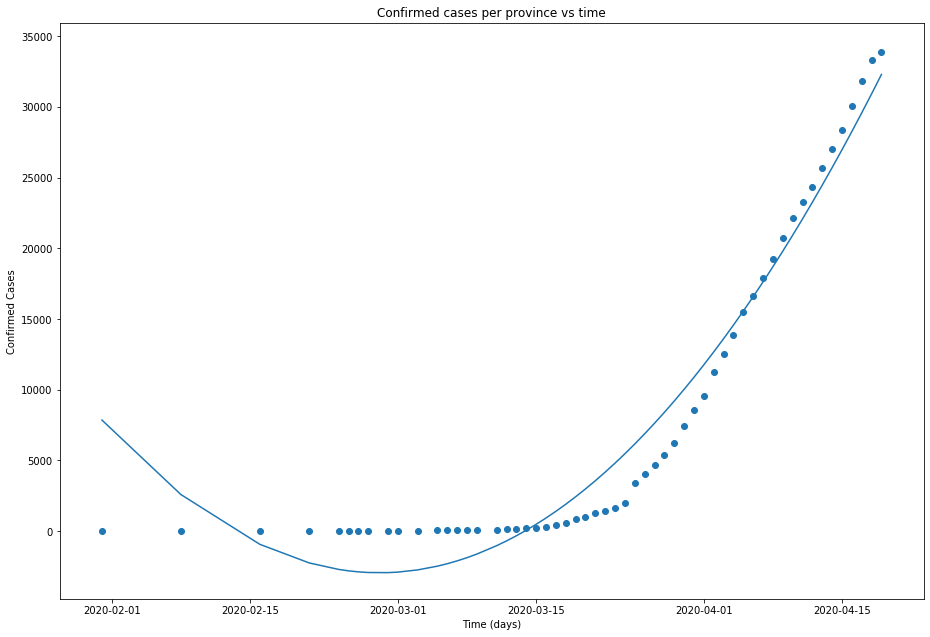

MSE predicted 5220196.005651002
MSE mean 117155457.16836736
R^2 =  0.955442143867452


C:\Users\Paul Kot\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [233]:
f = np.polyfit(X['Date'],CN['Confirmed-Cases'],2)
p = np.poly1d(f)

fig7=plt.figure()
ax7=fig7.add_axes([0,0,2,2])
ax7.plot(CN['Date'],p(X['Date']))
ax7.scatter(CN['Date'],CN['Confirmed-Cases'])


ax7.set_xlabel('Time (days)')
ax7.set_ylabel('Confirmed Cases')
ax7.set_title('Confirmed cases per province vs time')
#ax4.legend()

plt.show()

MSE_predict = mean_squared_error(CN['Confirmed-Cases'],p(X['Date']))
CN['Mean'] = np.mean(CN['Confirmed-Cases'])
MSE_mean = mean_squared_error(CN['Confirmed-Cases'],CN['Mean'])


R_2=(1-MSE_predict/MSE_mean)
print('MSE predicted',MSE_predict)
print('MSE mean',MSE_mean)
print("R^2 = ",R_2)

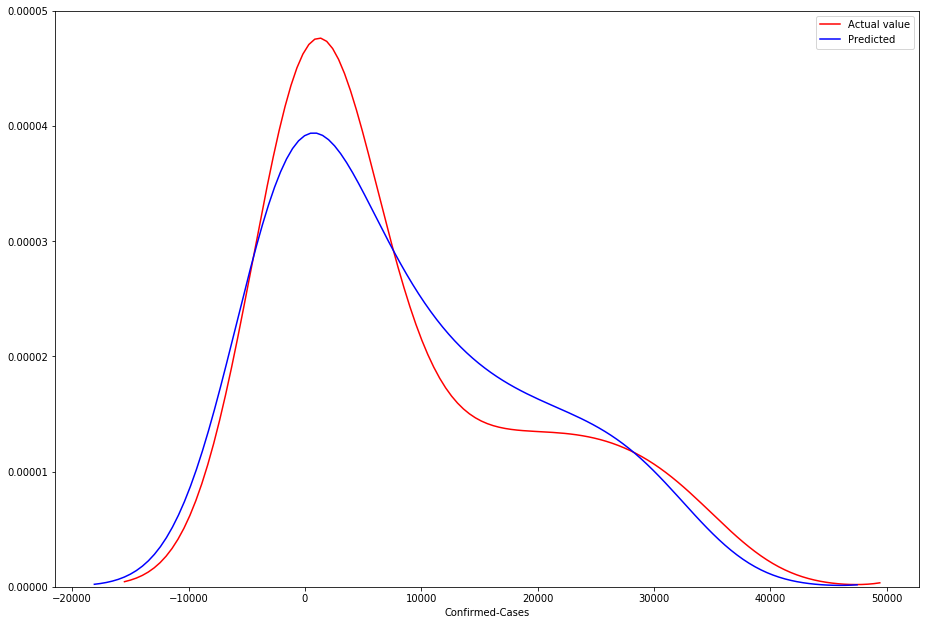

In [203]:
fig8=plt.figure()
ax8=fig8.add_axes([0,0,2,2])
ax8 = sns.distplot(CN['Confirmed-Cases'],hist=False,color="r",label="Actual value")
sns.distplot(p(X),hist=False,color='b', label='Predicted', ax=ax8)


,Date
Province-Name-EN,
Canada,31
Canada,39
Canada,47
Canada,52
Canada,55
Canada,56
Canada,57
Canada,58
Canada,60


[2.74556002e-01 7.75675933e+00 1.17873713e-12]


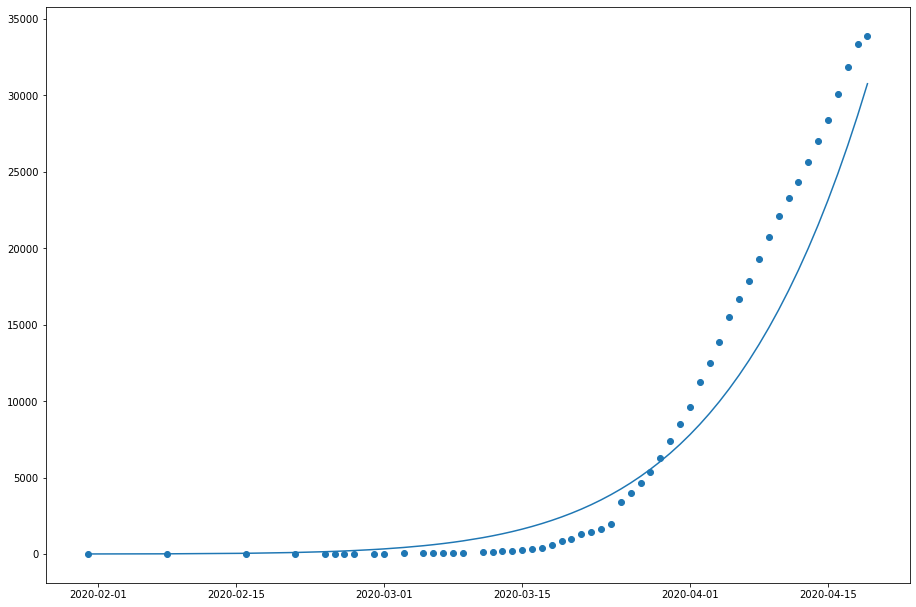

MSE predicted 8922795.922987435
MSE mean 117155457.16836736
R^2 =  0.9238379829787677


In [237]:
from scipy.optimize import curve_fit

c0 = 1
r=0.9
p=0.99
m = 1/(1-p)
A = np.power(c0,2/m)

def c_t(t,r,m,A):
    return ((r/m)*t+A)**m

def c_d(c_t,r,p):
    return (r*c_t)**p


def func(x, a, b, c):
    return a*x + b
#ydata = np.polyfit(CN_days,CN['Confirmed-Cases'],)
popt, pcov = curve_fit(c_t, X['Date'],CN['Confirmed-Cases'], bounds=(0,[r, m, A]))
print(popt)
ct = c_t(X['Date'],*popt)
#print(ct)
cd = c_d(ct,r,p)
#print(cd)

fig9=plt.figure()
ax9=fig9.add_axes([0,0,2,2])
ax9.plot(CN['Date'],cd)
ax9.scatter(CN['Date'],CN['Confirmed-Cases'])

#print(ydata)
#fig9=plt.figure()
#ax9=fig9.add_axes([0,0,1,1])
#BC_Graph = ax9.scatter(, np.log(BC['Confirmed-Cases']), color='blue')
#ax1.plot(CN_days,np.log(ydata))

#ax9.plot(X['Date'],np.log(cd))
#ax1.plot(CN_days,c_t(CN_days,*popt))
plt.show()

MSE_predict_1 = mean_squared_error(CN['Confirmed-Cases'],cd)
#CN['Mean'] = np.mean(CN['Confirmed-Cases'])
#MSE_mean = mean_squared_error(CN['Confirmed-Cases'],CN['Mean'])


R_2=(1-MSE_predict_1/MSE_mean)
print('MSE predicted',MSE_predict_1)
print('MSE mean',MSE_mean)
print("R^2 = ",R_2)



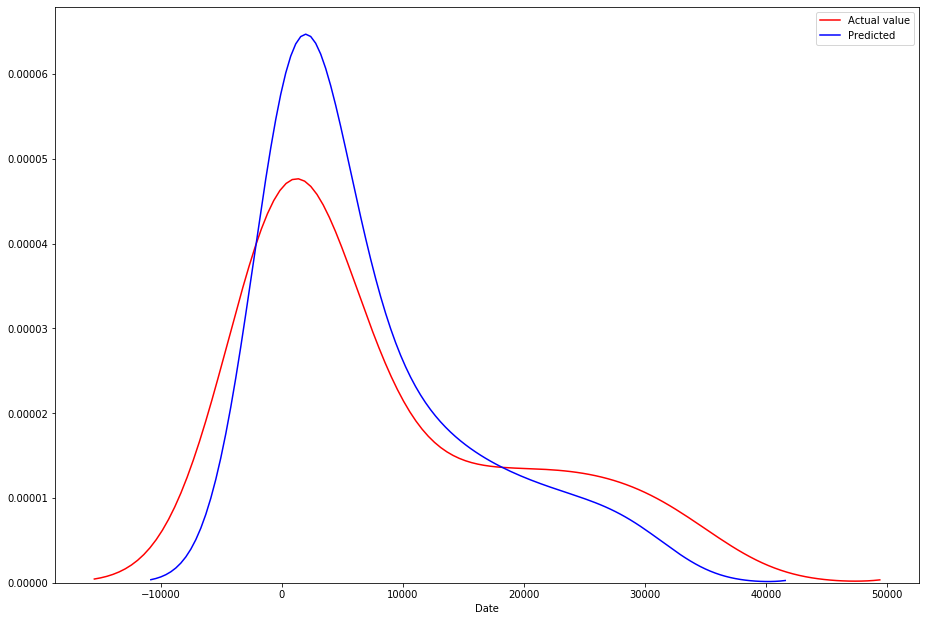

In [236]:
fig9=plt.figure()
ax9=fig9.add_axes([0,0,2,2])
ax9 = sns.distplot(CN['Confirmed-Cases'],hist=False,color="r",label="Actual value")
sns.distplot(cd,hist=False,color='b', label='Predicted', ax=ax9)

In [ ]:
pr = PolynomialFeatures(degree=2,include_bias=False)
x_polly=pr.fit_Transeform(df_

In [ ]:
#import matplotlib.pyplot as plt
#fig=plt.figure()
#ax=fig.add_axes([0,0,2,2])
#plt.plot(BC['Date'], BC['Total-Today'], color='blue')

#plt.plot(BC['Date'], ON['Total-Today'], color='pink')

#plt.plot(BC['Date'], QC['Total-Today'], color='g')

#plt.plot(BC['Date'], SK['Total-Today'], color='orange')

#plt.plot(BC['Date'], AB['Total-Today'], color='red')

#plt.plot(BC['Date'], CN['Total-Today'], color='black')


#plt.set_xlabel('Time (days)')
#plt.set_ylabel('Confirmed Cases')
#plt.set_title('Confirmed cases per province vs time')
#plt.legend()
#plt.show()






##replace all the missing information. True values above indicate that there 
## missing data.

##to remove values NaN use df.dropna(subset=["Deceased"], axis=0, inplace = ture)
## axis = 0 for entire row
## axis = 1 for entire column

## to replace missing values like NAN with actual values. used 'replace'
## Calulate the mean of the column for Deceased and Precent-Today

### examples of different replacement techniques
#mean_Deceased = df['Deceased'].mean(skipna=True)
#mean_Precent = df['Precent-Today'].mean()

## replace the values that are NaN With the mean

#df['Total-Today'].replace(np.nan,mean_Total,inplace = True)
#df['Deceased'].replace(np.nan,mean_Deceased)
#df['Precent-Today'].reaplace(np.nan,mean_Precent)






#not useful, just need to remember how this works
#df_1.describe()